In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,27,27]

0

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

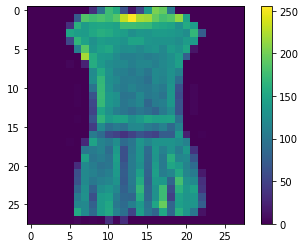

In [7]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.show()

In [8]:
# Data preprocessing
train_images = train_images / 255.0

test_images = test_images / 255.0

In [9]:
# Building the Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4954 - accuracy: 0.8260
Epoch 2/2
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3715 - accuracy: 0.8662


In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 25us/sample - loss: 0.4096 - accuracy: 0.8496
Test accuracy: 0.8496


In [13]:
predictions = model.predict(test_images)

In [14]:
print("the picture is of",class_names[np.argmax(predictions[0])])

the picture is of Ankle boot


In [15]:
def show_prediction(img):
    i=img
    plt.figure()
    plt.imshow(test_images[i])
    plt.colorbar()
    plt.show()
    print("the prediction is",class_names[np.argmax(predictions[i])]+" and real picture is of ",class_names[test_labels[i]]) 

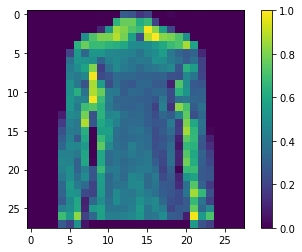

the prediction is Shirt and real picture is of  Shirt


In [21]:
show_prediction(758)